In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=4, suppress=True)  # Zaokrúhliť a vypnúť zobrazenie veľmi malých čísel


In [27]:
t = np.array([0, 1, 2, 3, 4])
tt = np.linspace(0, t[-1], 100)

f = np.array([0, 4, 6.1, 7.7, 9.2])



---
### $y(t) = a \cdot ln(b \cdot t)$

$t = (0, 1, 2, 3, 4)$

$f = (0, 4, 6.1, 7.7, 9.2)$

*Problem* - logaritmus nemoze prechadzat cez $0$

*Riesenie* - posunieme cas o 1

$y(t) = a \cdot ln(b \cdot (t + 1))$

$y(t) = a \cdot ln(b) + a \cdot ln (t + 1)$

$y(t) = c_0 + c_1 \cdot ln (t + 1)$ *\*z tohto pocitame bazu\**


$c_1 = a$

$c_0 = a \cdot ln(b)$

$\Rightarrow b = e^{\dfrac{c_0}{a}} = exp \left( \dfrac{c_0}{a} \right)$

Bazicke vektory

$\mathbf{b_1} = (1, 1, 1, 1, 1)$

$\mathbf{b_2} = ln(t + 1)$



a = 5.634803901905331
b = 1.0008317090350392


,0,1,2,3,4
t,0.000000,1.000000,2.000000,3.000000,4.000000
t+1,1.000000,2.000000,3.000000,4.000000,5.000000
b0,1.000000,1.000000,1.000000,1.000000,1.000000
b1,0.000000,0.693147,1.098612,1.386294,1.609438
f,0.000000,4.000000,6.100000,7.700000,9.200000
fp,0.004685,3.910433,6.195149,7.816181,9.073552
f-fp,-0.004685,0.089567,-0.095149,-0.116181,0.126448
^2,0.000022,0.008022,0.009053,0.013498,0.015989


c0 = 0.004684569486435334
c1 = 5.634803901905331
chyba = 0.2158354057316525 (0.0431670811463305 per prvok)


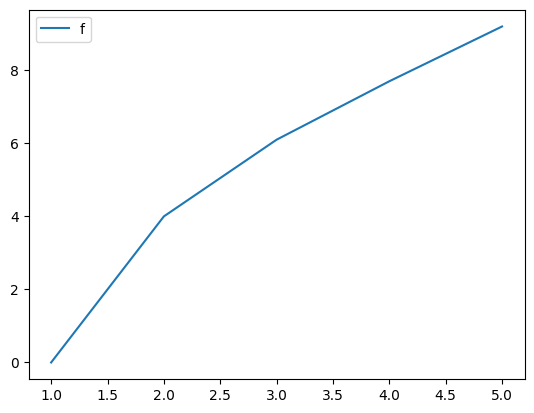

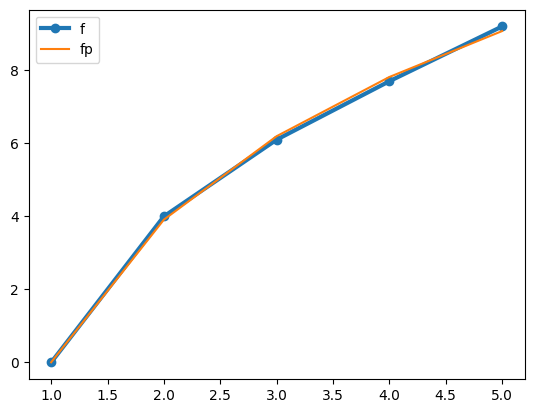

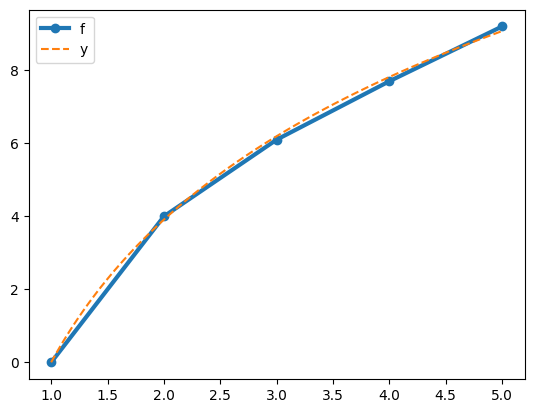

In [28]:

b0 = np.ones(len(t))
b1 = np.log(t + 1)

A = np.array([[np.dot(b0, b0), np.dot(b1, b0)], [np.dot(b0, b1), np.dot(b1, b1)]])
b = np.array([np.dot(f, b0), np.dot(f, b1)])

c0, c1 = np.linalg.solve(A, b)

# povodne koeficienty z povodnej rovnice zo zadania
a = c1
b = np.exp(c0 / a)
print(f"a = {a}\nb = {b}")

fp = a * np.log(b * (t + 1))  # z povodnej rovnice
y = a * np.log(b * (tt + 1))  # z povodnej rovnice

chyba = np.sqrt(sum(np.pow(f - fp, 2)))

df = pd.DataFrame([t, t+1, b0, b1, f, fp, f-fp, np.pow(f-fp, 2)], index=["t", "t+1", "b0", "b1", "f", "fp", "f-fp", "^2"])
display(df)
print(f"c0 = {c0}\nc1 = {c1}")
print(f"chyba = {chyba} ({chyba/len(f)} per prvok)")

plt.figure()
plt.plot((t + 1), f, label="f")
plt.legend()
plt.show()

plt.figure()
plt.plot((t + 1), f, "o-", label="f", linewidth=3)
plt.plot((t + 1), fp, label="fp")
plt.legend()
plt.show()

plt.figure()
plt.plot((t + 1), f, "o-", label="f", linewidth=3)
plt.plot((tt + 1), y, "--", label="y")
plt.legend()
plt.show()


## $y(t) = a \cdot t^b$

$ln(y(t)) = ln(a) + b \cdot ln(t)$

$ln(y(t)) = c_0 + c_1 \cdot ln(t)$

$a = exp(c_0)$

$b = c_1$